# COVID-19, Analiza eksploracyjna danych z podziałem na regiony

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Wczytujemy dane dotyczące wszystkich regionów.

In [3]:
reg_names_dict = {
    0: 'Dolnośląskie',
    1: 'Kujawsko-Pomorskie',
    2: 'Lubelskie',
    3: 'Lubuskie',
    4: 'Łódzkie',
    5: 'Małopolskie',
    6: 'Mazowieckie',
    7: 'Opolskie',
    8: 'Podkarpackie',
    9: 'Podlaskie',
    10: 'Pomorskie',
    11: 'Śląskie',
    12: 'Świętokrzyskie',
    13: 'Warmińsko-Mazurskie',
    14: 'Wielkopolskie',
    15: 'Zachodniopomorskie'
}

In [4]:
reg_dict = {}
for i in range(0,16):
    filename = reg_names_dict[i] + '_data_formatted.xlsx'
    print(filename)
    reg_dict[reg_names_dict[i]] = pd.read_excel(filename, index_col = 0)
    reg_dict[reg_names_dict[i]].loc[:,'Data'] = pd.date_range(start="2020-03-04",end="2020-12-16")
    reg_dict[reg_names_dict[i]].loc[:,'Procent dodatnich wyników'] = reg_dict[reg_names_dict[i]]['Nowe przypadki']/reg_dict[reg_names_dict[i]]['Liczba testów']

Dolnośląskie_data_formatted.xlsx
Kujawsko-Pomorskie_data_formatted.xlsx
Lubelskie_data_formatted.xlsx
Lubuskie_data_formatted.xlsx
Łódzkie_data_formatted.xlsx
Małopolskie_data_formatted.xlsx
Mazowieckie_data_formatted.xlsx
Opolskie_data_formatted.xlsx
Podkarpackie_data_formatted.xlsx
Podlaskie_data_formatted.xlsx
Pomorskie_data_formatted.xlsx
Śląskie_data_formatted.xlsx
Świętokrzyskie_data_formatted.xlsx
Warmińsko-Mazurskie_data_formatted.xlsx
Wielkopolskie_data_formatted.xlsx
Zachodniopomorskie_data_formatted.xlsx


Wyświetlamy poniżej dane dla województwa Kujawsko-Pomorskiego:

In [6]:
wyb_woj = 1
reg_dict[reg_names_dict[wyb_woj]].info()
reg_dict[reg_names_dict[wyb_woj]].tail(7)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 288 entries, 2020-03-04 to 2020-12-16
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Nowe przypadki                  288 non-null    int64         
 1   Aktywne przypadki               288 non-null    int64         
 2   Suma potwierdzonych przypadków  288 non-null    int64         
 3   Liczba testów                   217 non-null    float64       
 4   Data                            288 non-null    datetime64[ns]
 5   Procent dodatnich wyników       217 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 15.8 KB


,Nowe przypadki,Aktywne przypadki,Suma potwierdzonych przypadków,Liczba testów,Data,Procent dodatnich wyników
2020-12-10,1404,49138,66260,2283.428571,2020-12-10,0.614865
2020-12-11,1002,50088,67262,2283.428571,2020-12-11,0.438814
2020-12-12,1083,51124,68345,2283.428571,2020-12-12,0.474287
2020-12-13,756,51862,69101,2283.428571,2020-12-13,0.331081
2020-12-14,531,52384,69632,NaN,2020-12-14,NaN
2020-12-15,750,53106,70382,NaN,2020-12-15,NaN
2020-12-16,1181,54242,71563,NaN,2020-12-16,NaN


Generujemy opis zmienności danego województwa w postaci tabelki.

In [5]:
# opis danych z tabeli
def opis_df(dataframe):
    df_opis = pd.DataFrame()
    df_opis.loc[:,'mean'] = dataframe.mean(numeric_only=True)
    df_opis.loc[:,'median'] = dataframe.median(numeric_only=True)
    df_opis.loc[:,'min'] = dataframe.min()
    df_opis.loc[:,'max'] = dataframe.max()
    df_opis.loc[:,'skew'] = dataframe.skew()
    return df_opis

In [6]:
opis_df(reg_dict[reg_names_dict[wyb_woj]])

,mean,median,min,max,skew
Nowe przypadki,248.482639,11.000000,0,1954,1.890864
Aktywne przypadki,6610.701389,306.000000,0,54242,2.100444
Suma potwierdzonych przypadków,9356.906250,744.000000,0,71563,2.110219
Liczba testów,1707.400922,1342.428571,661.714,3676.14,0.827504
Procent dodatnich wyników,0.113014,0.015674,0,0.614865,1.392938


Wyznaczamy korelacje między poszczególnymi cechami.

Text(0.5, 1.0, 'Macierz korelacji pomiędzy cechami')

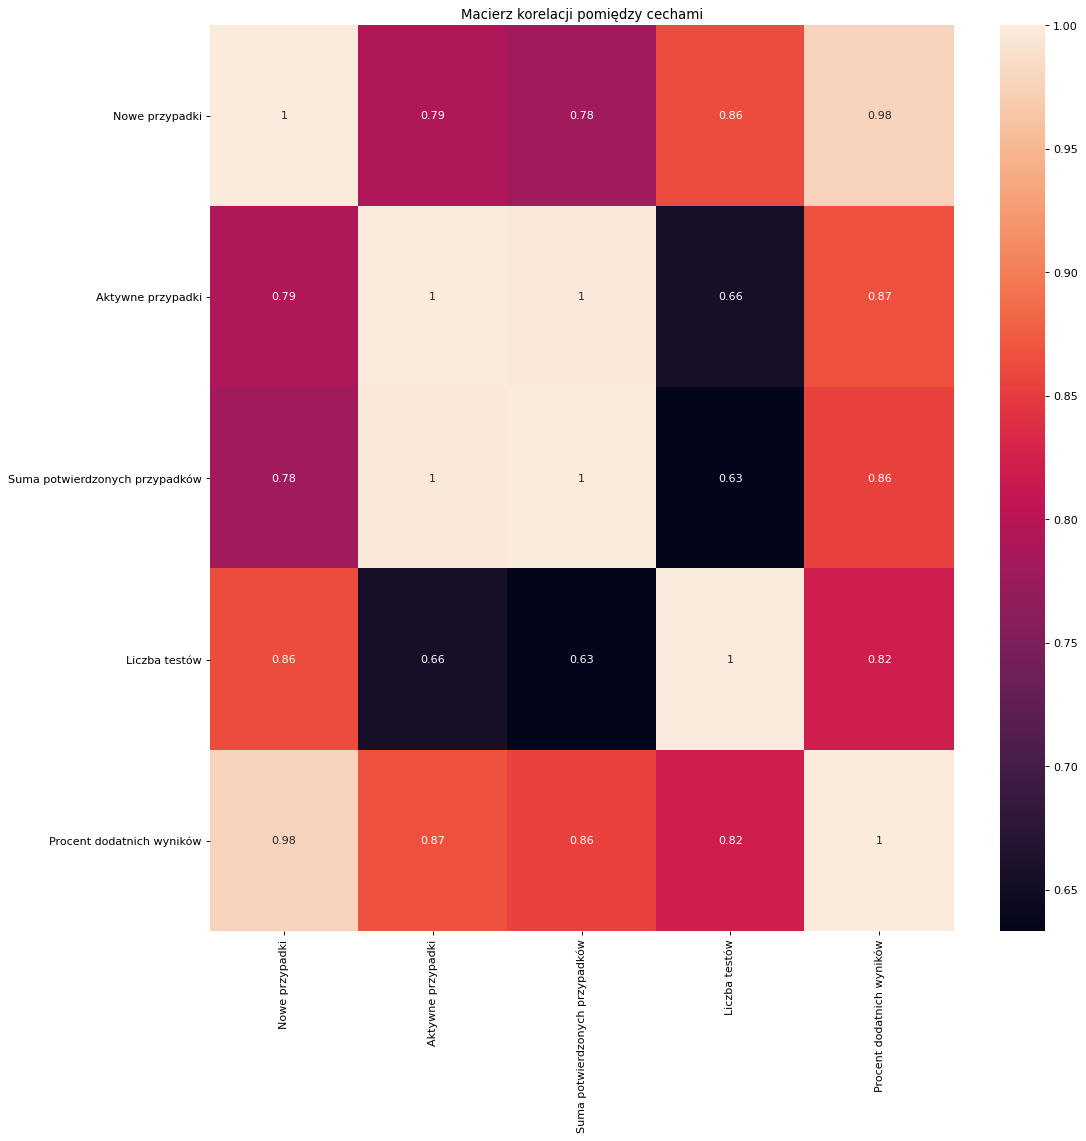

In [7]:
plt.figure(figsize=(15,15),dpi = 80)
sns.heatmap(reg_dict[reg_names_dict[wyb_woj]].corr(),annot = reg_dict[reg_names_dict[wyb_woj]].corr())
plt.title("Macierz korelacji pomiędzy cechami")

Szukamy brakujących danych w zbiorach:

In [8]:
for i in range(0,16):
    print(reg_names_dict[i], reg_dict[reg_names_dict[i]].isnull().sum().sum())

Dolnośląskie 142
Kujawsko-Pomorskie 142
Lubelskie 142
Lubuskie 142
Łódzkie 142
Małopolskie 142
Mazowieckie 142
Opolskie 142
Podkarpackie 142
Podlaskie 142
Pomorskie 142
Śląskie 142
Świętokrzyskie 324
Warmińsko-Mazurskie 142
Wielkopolskie 142
Zachodniopomorskie 142


We wszystkich wczytanych zbiorach brakuje informacji o ilości wykonanych testów w przeciągu 71 dni w zakresie dat 4.03-13.05. Są to dane których nie możemy samodzielnie uzupełnić. Dodatkowo w obrębie województwa Świętokrzyskiego brakuje takich danych z okresu 162 dni. Z tego wynikają także braki w kolumnie opisującej % dodatnich wyników testów, których to nie możemy wyliczyć.

In [9]:
# funkcja licząca kroczącą średnią 7 dniową dla całej kolumny
def mean_7d(df, column):
    n = df[column].size
    df_temp = pd.DataFrame()
    for i in range(6,n):
        mean_7d = 0
        for j in range(7):
            mean_7d += df[column][i-j]/7
        df_temp.loc[i-6,'mean_7d'] = mean_7d
    return np.array(df_temp)

In [10]:
# reg_dict_7d = {}
# for i in range(0,16):
#     reg_dict_7d[reg_names_dict[i]] = reg_dict[reg_names_dict[i]][6:]
#     reg_dict_7d[reg_names_dict[i]] = reg_dict_7d[reg_names_dict[i]].drop(['Suma potwierdzonych przypadków'], axis=1)
#     reg_dict_7d[reg_names_dict[i]].loc[:,'Nowe przypadki'] = mean_7d(reg_dict[reg_names_dict[i]], 'Nowe przypadki')
#     reg_dict_7d[reg_names_dict[i]].loc[:,'Aktywne przypadki'] = mean_7d(reg_dict[reg_names_dict[i]], 'Aktywne przypadki')
#     print(reg_dict_7d[reg_names_dict[i]].head(1))

Zestawienie dobowych przyrostów nowych przypadków w poszczególnych województwach. Duża zmienność między poszczególnymi regionami widoczna zwłaszcza w trakcie 2 fali na jesieni '20 pokazuje konieczność oddzielnej interpretacji tych danych dla każdego województwa.

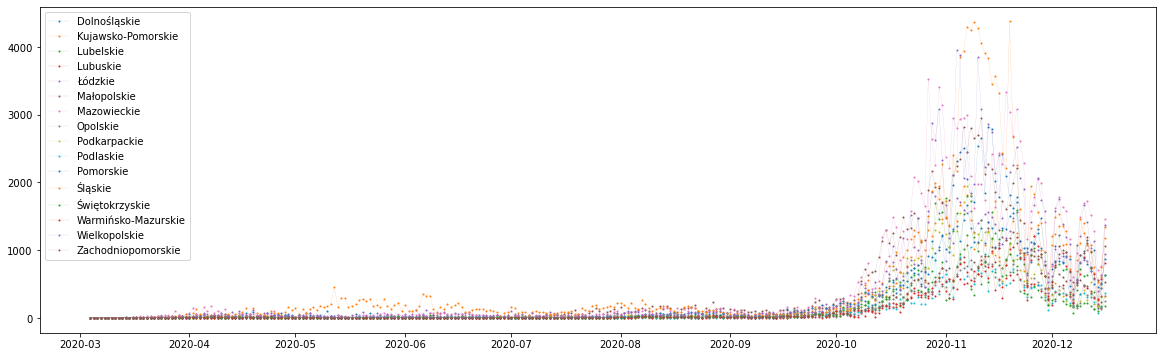

In [11]:
plt.figure(figsize=(20,6))
for i in range(0,16):
    plt.plot(reg_dict[reg_names_dict[i]]["Data"], reg_dict[reg_names_dict[i]]["Nowe przypadki"],'.-', markersize=2, linewidth=0.1, label=reg_names_dict[i])
plt.legend()
plt.show()

Poniżej przedstawiamy wykres zależności ilości nowych przypadków od potwierdzonych już przypadków w danym województwie.
Lepiej obrazuje on różnice dynamiki przyrostów, zwłaszcza w ciągu ostatnich dwóch miesięcy.

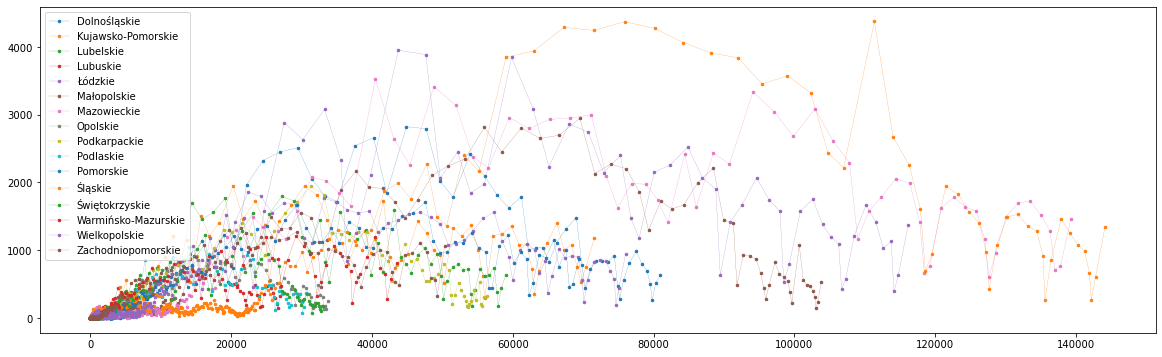

In [12]:
plt.figure(figsize=(20,6))
for i in range(0,16):
    plt.plot(reg_dict[reg_names_dict[i]]["Suma potwierdzonych przypadków"], reg_dict[reg_names_dict[i]]["Nowe przypadki"],'.-', markersize=5, linewidth=0.2, label=reg_names_dict[i])
plt.ticklabel_format(style='plain')
plt.legend()
plt.show()

Liczba testów jest raportowana tylko raz na tydzień w każdym województwie. Poniżej prezentujemy nasz tymczasowy sposób obejścia te nieciągłości danych poprzez przypisanie do każdego dnia tygodnia 1/7 wartości tygodniowej w danym regionie.

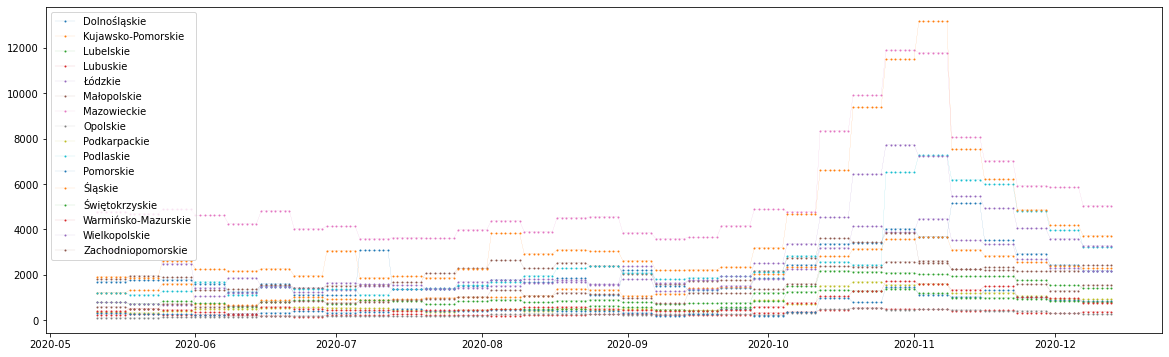

In [13]:
plt.figure(figsize=(20,6))
for i in range(0,16):
    plt.plot(reg_dict[reg_names_dict[i]]["Data"], reg_dict[reg_names_dict[i]]["Liczba testów"],'.-', markersize=2, linewidth=0.1, label=reg_names_dict[i])
plt.legend()
plt.show()

Reprezentacja dodatniości wyników testów. W kilku regionach jest on wyższy niż 100%, co wynika z wadliwego systemu raportowania miejsca przeprowadzenia testu i przypisywania wartości dodatniej do miejsca zameldowania danego obywatela, zamiast do miejsca wykonania testu.

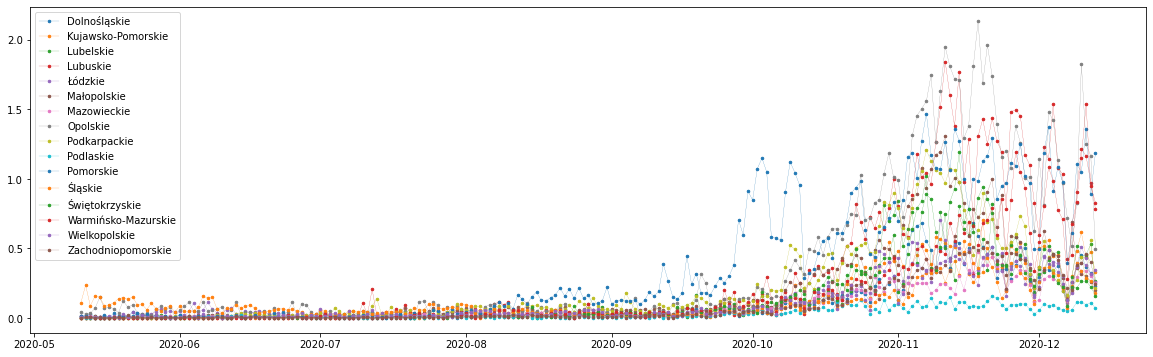

In [14]:
plt.figure(figsize=(20,6))
for i in range(0,16):
    plt.plot(reg_dict[reg_names_dict[i]]["Data"], reg_dict[reg_names_dict[i]]["Procent dodatnich wyników"],'.-', markersize=5, linewidth=0.2, label=reg_names_dict[i])
plt.legend()
plt.show()